### Imports and Definitions

In [1]:
from glob import glob
from matplotlib import rcParams
from matplotlib.lines import Line2D
from os import makedirs
from seaborn import distplot, set_context, set_style
import matplotlib.pyplot as plt
DATADIR = '../data'
FIGDIR = '../figs'; makedirs(FIGDIR, exist_ok=True)
RC = {"font.size":12,"axes.titlesize":16,"axes.labelsize":14,"legend.fontsize":10,"xtick.labelsize":10,"ytick.labelsize":10}
set_context("paper", rc=RC); set_style("ticks"); rcParams['font.family'] = 'serif'
rcParams['patch.edgecolor'] = '4C4C4C' # set boxenplot outlines same as violinplot

### Plot Similarity Score Distributions

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

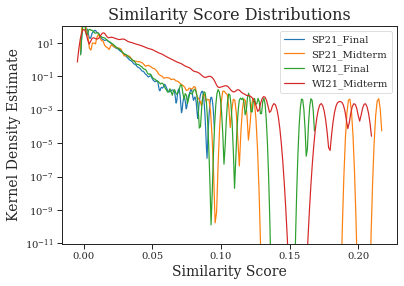

In [2]:
fig, ax = plt.subplots()
for fn in glob('%s/similarity_csv/*.csv' % DATADIR):
    distplot([float(l.split(',')[2]) for l in open(fn)], kde=True, hist=False, label=fn.split('/')[-1].rstrip('.csv'))
plt.title("Similarity Score Distributions")
plt.xlabel("Similarity Score")
plt.ylabel("Kernel Density Estimate")
plt.ylim(ymin=10**-11, ymax=100)
ax.set_yscale('log')
plt.legend()
fig.savefig('%s/similarity_dists.pdf' % FIGDIR, format='pdf', bbox_inches='tight')